In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [59]:
import pandas as pd
import numpy as np

**Read all data and set hn as index**

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv')
df = df.set_index('hn')
df.head()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Data Preprocessing**

In [61]:
df

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df.shape

(1723, 23)

In [63]:
df.isnull().sum(axis=0) #0 = row

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
appearance    101
stage          24
pchemo          1
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

In [64]:
df_clean_column = df.drop(['appearance','Wardsize','RHlvsi','depth','size','nodeyiel','vgmargin','pelvicme','adnmet'],axis=1) #1 = column
df_clean_column.isnull().sum(axis=0)

age            0
parity         0
hiv            4
menopaus       1
disease        0
surgery        0
conization     5
OPDsize       17
stage         24
pchemo         1
finalhisto    10
utmet         98
vgmet         97
pmmet         94
dtype: int64

In [65]:
df_clean = df_clean_column.dropna(axis=0)
df_clean.isnull().sum(axis=0)

age           0
parity        0
hiv           0
menopaus      0
disease       0
surgery       0
conization    0
OPDsize       0
stage         0
pchemo        0
finalhisto    0
utmet         0
vgmet         0
pmmet         0
dtype: int64

In [66]:
df_clean.shape

(1571, 14)

In [67]:
df_clean

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,stage,pchemo,finalhisto,utmet,vgmet,pmmet
hn,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,4.0,0.0,3.0,0.0,0.0,0.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


เช็คข้อมูลที่เราจะทำนาย = pmmet

In [68]:
df_pm = df_clean['pmmet'].unique()
df_pm

array([0., 1.])

In [69]:
pm_group =  [sum(df_clean['pmmet']==df_pm[0]), #index 0
             sum(df_clean['pmmet']==df_pm[1])] #index 1
pm_group

[1291, 280]

In [70]:
df_clean.groupby('pmmet').count() #สั่งแบบนี้ก็ได้

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,stage,pchemo,finalhisto,utmet,vgmet
pmmet,,,,,,,,,,,,,
0.0,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291
1.0,280,280,280,280,280,280,280,280,280,280,280,280,280


แยกฉลากของข้อมูลไปเก็ยไว้ในตัวแปร

In [71]:
y = df_clean['pmmet'].values #label ค่าของข้อมูล
X = df_clean.drop(['pmmet'],axis = 1).values # feature ส่วนที่เหลือทั้งหมดของข้อมูลที่เอาไว้สอน model

In [72]:
X.shape

(1571, 13)

บ่งข้อมูลเป็น train,test ปกติเราจะแบ่ง train 70% แล้ว 30% เป็น test หรือถ้าข้อมูลน้อยมากๆก็เป้น 80:20

In [73]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [74]:
X_train.shape

(1256, 13)

In [75]:
y_train.shape

(1256,)

In [76]:
X_test.shape

(315, 13)

In [77]:
y_test.shape

(315,)

In [78]:
from sklearn.preprocessing import MinMaxScaler #คำสั่ง
scaler = MinMaxScaler(feature_range=(0, 1)) #normalization ให้ช่วงข้อของมูลอยู่ในระดับเดียวกัน 0-1 โดยการปรับค่ามากสุดเป็น 1 น้อยสุดเป็น 0
scaler.fit(X_train) #ปรับ X_train (features ที่นำมาสอน) ทั้งหมด : ใช้ X_train ในการหาสเกลเท่านั้น
X_train_norm = scaler.transform(X_train) #X_train_norm that already normalize : feature ที่นำมาสอน 
X_test_norm = scaler.transform(X_test) #X_test_norm that already normalize  : feature ที่นำมาทดสอบ 

In [79]:
X_train

array([[33.,  3.,  0., ...,  4.,  0.,  0.],
       [30.,  1.,  0., ...,  2.,  0.,  1.],
       [30.,  0.,  0., ...,  2.,  0.,  0.],
       ...,
       [61.,  2.,  0., ...,  2.,  0.,  0.],
       [60.,  2.,  0., ...,  1.,  0.,  0.],
       [37.,  0.,  0., ...,  1.,  1.,  0.]])

In [80]:
X_train_norm

array([[0.17460317, 0.23076923, 0.        , ..., 0.75      , 0.        ,
        0.        ],
       [0.12698413, 0.07692308, 0.        , ..., 0.25      , 0.        ,
        0.5       ],
       [0.12698413, 0.        , 0.        , ..., 0.25      , 0.        ,
        0.        ],
       ...,
       [0.61904762, 0.15384615, 0.        , ..., 0.25      , 0.        ,
        0.        ],
       [0.6031746 , 0.15384615, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23809524, 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ]])

In [81]:
np.min(X_train_norm, axis=0) #ค่าที่ต่ำของทุก cloumn คือ 0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
np.min(X_test_norm, axis=0) #ค่าที่ต่ำของทุก cloumn คือ 0

array([0.06349206, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

# **Logistic Regression** 

Trainning (clf ย่อมาจาก classtifier)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [84]:
params = {'C': [0.25,0.5,0.75,1,2,3,4,5]} #parameter เพื่อจูนค่า 
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10) #GridSeachcv เอาไว้หา parameter ที่ดีที่สุด โดยวัดจากค่า accuracy 
clf.fit(X_train_norm, y_train) #ลอง train 

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [0.25, 0.5, 0.75, 1, 2, 3, 4, 5]})

In [85]:
print("Best params : " +str(clf.best_params_)) #ค่า C ที่ดีที่สุดคือ 1
print("10CV accuracy : "+str(clf.best_score_*100)) #ค่า accuracy ของ train ก่อน 

Best params : {'C': 1}
10CV accuracy : 81.37079365079366


Testing

In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [87]:
y_predict = clf.predict(X_test_norm) #label ของ test
y_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [88]:
100*sum(y_test == y_predict)/len(y_test) #labal ของ test เทียบกับ label จริงๆของคำตอบนั้นเพื่อดู accuaracy

87.61904761904762

Visualization

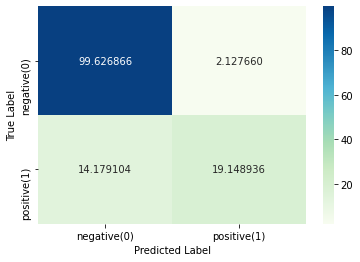

In [89]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative(0)', 'positive(1)']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [90]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

 negative(0)       0.88      1.00      0.93       268
 positive(1)       0.90      0.19      0.32        47

    accuracy                           0.88       315
   macro avg       0.89      0.59      0.62       315
weighted avg       0.88      0.88      0.84       315



# Support Vector Machine

Trainning

In [91]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [92]:
params = { 'C': [2,4,8,16,32,64,128], #High Cost = High accuracy
           'gamma': [0.01,0.25,0.50,0.75,1]  #Low Gramma = High Influence  
         }
clf = GridSearchCV(SVC(),params,cv=10) #algorithm 
clf.fit(X_train_norm, y_train) # ลอง train

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [2, 4, 8, 16, 32, 64, 128],
                         'gamma': [0.01, 0.25, 0.5, 0.75, 1]})

In [93]:
print("Best param : "+str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best param : {'C': 128, 'gamma': 0.25}
10CV accuracy : 82.01079365079366


Testing

In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [95]:
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 82.85714285714286


Visualization

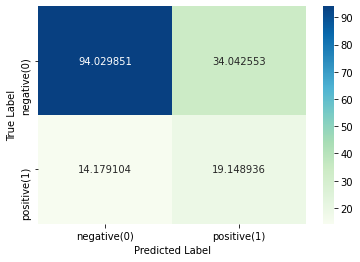

In [96]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative(0)', 'positive(1)']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [97]:
print(classification_report(y_test,y_predict,target_names=target_names))

              precision    recall  f1-score   support

 negative(0)       0.87      0.94      0.90       268
 positive(1)       0.36      0.19      0.25        47

    accuracy                           0.83       315
   macro avg       0.61      0.57      0.58       315
weighted avg       0.79      0.83      0.81       315



# **Random Forest**

Training

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [99]:
params = {
    'n_estimators' : [10,50,100,200,500],
    'min_samples_leaf' : [1,2,4,8,16,32],
    'max_features' : ['sqrt',0.5,0.8],
    'criterion' : ['gini','entropy']
}
clf = GridSearchCV(RandomForestClassifier(random_state=0),params, cv = 10)
clf.fit(X_train_norm, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 0.5, 0.8],
                         'min_samples_leaf': [1, 2, 4, 8, 16, 32],
                         'n_estimators': [10, 50, 100, 200, 500]})

In [100]:
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 100}
10CV accuracy : 82.32698412698414


Testing

In [101]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [102]:
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 86.66666666666667


Visualization

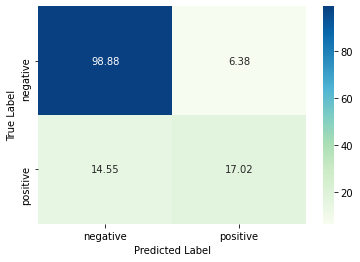

In [103]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [104]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.87      0.99      0.93       268
    positive       0.73      0.17      0.28        47

    accuracy                           0.87       315
   macro avg       0.80      0.58      0.60       315
weighted avg       0.85      0.87      0.83       315



# **XGBoost**

Training

In [105]:
!pip install xgboost

In [ ]:
params = {
    'n_estimators' : [1000],
    'max_depth' : [2, 3, 4, 8],
    'learning_rate' : [0.001, 0.01, 0.1],
    'subsample' : [0.5,0.8, 1],
    'colsample_bytree' : [0.5, 0.8, 1]    
}
clf = GridSearchCV(xgb.XGBClassifier(random_state=0, objective='binary:logistic',n_jobs=-1),params, cv = 10)
clf.fit(X_train_norm, y_train)

[00:49:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [ ]:
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Testing

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Visualization

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict, target_names=target_names))

# **SGD**

Training

In [ ]:
from sklearn_model import SGCClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'loss' : ['hinge','log','modified_huber','squared_hinge','perceptron'],
    'pernalty' : ['12','l1','none','elasticnet'],
    'alpha' : [0.0001, 0.001, 0.01,0.1],
    'eta0' : [0.001,0.01,0.1],
    'l1_ratio' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]    
}
clf = GridSearchCV(xgb.XGBClassifier(random_state=0, objective='binary:logistic',n_jobs=-1),params, cv = 10)
clf.fit(X_train_norm, y_train)

In [ ]:
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Testing

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

visualization

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict, target_names=target_names))